# Hypothesis testing


* Hypothesis is the way to predit the relatin between two or more variables by studying past behavior.

* for considering the past data we need to make some possible outcomes which are called as null hypothesis and is denoted by h0.

* An counter consideration made on null hypothesis is denoted as ha which is complletely opposite to h0.

* The hypothesis-testing procedure involves using sample data to determine whether or not H0 can be rejected. 

*  If H0 is rejected, the statistical conclusion is that the alternative hypothesis Ha is true.

* Types of Hypothesis test is :
1.Z-Test
<br>
2.T-Test
<br>
3.Chi-square Test
<br>
4.Anova Test


# Steps of conducting hypothesis test.
1.     The first step is for the analyst to state the two hypotheses so that only one can be right.
    
1.     The next step is to formulate an analysis plan, which outlines how the data will be evaluated.
    
1.     The third step is to carry out the plan and physically analyze the sample data.
    
1.     The fourth and final step is to analyze the results and either reject the null hypothesis, or state that the null hypothesis is plausible, given the data.


# Import Libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # impoting warning so that even if some issue occured in plotting the warining should not be visible in between the run.
from statsmodels.stats.weightstats import ztest as ztest

# 1. T-Test

1. This test is conducted between two numerical variables.
2. As this test is basically conducted to measure the acceptablity of h0 and ha
3. in order to do so, we must have p value. which explains the relatability of two variables on each other.
4. The p-value is a number, calculated from a statistical test, that describes how likely you are to have found a particular set of observations if the null hypothesis were true.(Mainly if the P > alpha value which in most cases is 0.05, we reject the null hypothesis and consider that)

In [2]:
def plot_distribution_hist_mean(inpt, title):
    plt.figure()
    ax = sns.distplot(inpt)
    plt.axvline(np.mean(inpt), color='k', linestyle='dashed', linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
    inpt.mean() + inpt.mean()/10,
    max_ - max_/10,
    "mean : {:.2f}".format(inpt.mean())
     )
    plt.title(title)
    return plt.figure

In [3]:
def t_test(arr_1, arr_2, alpha=0.05):
    print(stats.ttest_ind(arr_1, arr_2))
    stat, p_value = stats.ttest_ind(arr_1, arr_2)

    if p_value>alpha:
        print("Same distribution ( accept H0 )")
    else:
        print("Different distribution ( reject H0 )")

In [4]:
ger_sales=np.load("../input/hypothesis-testing1/germany_sales.npy")
far_sales=np.load("../input/hypothesis-testing1/france_sales.npy")

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

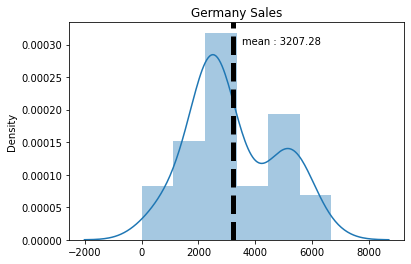

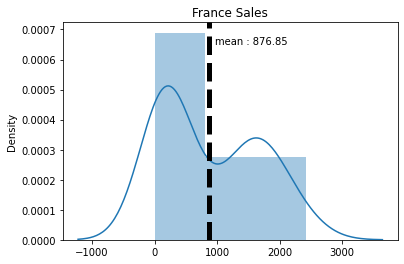

In [5]:
plot_distribution_hist_mean(ger_sales,"Germany Sales")
plot_distribution_hist_mean(far_sales,"France Sales")

In [6]:
t_test(ger_sales,far_sales)

Ttest_indResult(statistic=7.401250878526029, pvalue=6.861882182135869e-11)
Different distribution ( reject H0 )


Conclusion :-
* It is good to have low P-values.
* A P-value is referred to as the probability that the outcomes from the sample data happened coincidentally.
* If the pvalue is more than alpha null hypotheiss is accepted

* If the statistics is between standard deviation than null hypotheiss is accepted


# 2. Anova-Test

* An Anovaa test is a type of statistical test used to determine if there is a statistically significant difference between two or more categorical groups by testing for differences of means using variance.

* It is done between two multivariable values ie - may be of differnet datatypes


In [7]:
def find_unique(df,colmn):
    unique_values = df[colmn].unique()
    len_unique_values=len(unique_values)
    print(f"total numbers of unique variables :{len_unique_values}")
    return unique_values 

In [8]:
def find_numeric_values_of_a_column(df,colmn,numeric_value):
    unique_values=find_unique(df,colmn)
    new_dataset=pd.DataFrame({i:list(df[df[colmn]==i][numeric_value]) for i in unique_values})
#     print(new_dataset)
    return new_dataset

In [9]:
def anova_test(df,colmn,numeric_value,x1,x2,x3 ,alpha=0.05):
    new_dataset=find_numeric_values_of_a_column(df,colmn,numeric_value)
    print(stats.f_oneway(new_dataset[x1],new_dataset[x2],new_dataset[x3]))
    
    stat, p_value = stats.f_oneway(new_dataset[x1],new_dataset[x2],new_dataset[x3])

    if p_value>alpha:
        print("Same distribution ( accept H0 )")
    else:
        print("Different distribution ( reject H0 )")

In [10]:
iris=sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
find_unique(iris,"species")

total numbers of unique variables :3


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
find_numeric_values_of_a_column(iris,"species","petal_length")

total numbers of unique variables :3


,setosa,versicolor,virginica
0,1.4,4.7,6.0
1,1.4,4.5,5.1
2,1.3,4.9,5.9
3,1.5,4.0,5.6
4,1.4,4.6,5.8
5,1.7,4.5,6.6
6,1.4,4.7,4.5
7,1.5,3.3,6.3
8,1.4,4.6,5.8
9,1.5,3.9,6.1


In [13]:
anova_test(iris,"species","petal_length",'setosa', 'versicolor', 'virginica' ,alpha=0.05)

total numbers of unique variables :3
F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)
Different distribution ( reject H0 )


Conclusion :-
<br>
* When reporting the results of an anova, include a brief description of the variables you tested,degrees of freedom and p-values for each independent variable, and explain what the results mean.
<br>
* it can perticularly mention to reject or to accept the null hypothesis.

# 3. Chi Square-Test

* A Chi-square test, also called Pearson Chi-square test as is a statistical test used to compare observed results with expected results. 

* The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

* It deals with correlation between the categorical variables by analyzing the relationship between the observed and expected values.

* The Chi-square test is intended to test how likely it is that an observed distribution is due to chance.

In [14]:
def chi_square_test(df1,colmn1,colmn2,std):
    observed_values_table = pd.crosstab(df1[colmn1], df1[colmn2])
    print(f"Actual value \n{observed_values_table}")
    print()
    expected_values = stats.chi2_contingency(observed_values_table)[3]
    print(f"Expected value \n{expected_values}")
    print()
    [(o-e)**2 for o,e in zip(observed_values_table.values, expected_values )]
    chi_square_statistics = np.sum(sum([((o-e)**2)/e for o,e in zip(observed_values_table.values, expected_values )]))
    print(f"chi square statistics \n{chi_square_statistics}")
    print()
    output=std - stats.chi2.cdf(chi_square_statistics, df = std)
    print(f"final output \n{output}")
    print()

    if (std)>output>(-std):
        print("Same distribution ( accept H0 )")
    else:
        print("Different distribution ( reject H0 )")

In [15]:
tips=sns.load_dataset("tips")

In [16]:
chi_square_test(tips,"sex","smoker",1)

Actual value 
smoker  Yes  No
sex            
Male     60  97
Female   33  54

Expected value 
[[59.84016393 97.15983607]
 [33.15983607 53.84016393]]

chi square statistics 
0.001934818536627623

final output 
0.964915107315732

Same distribution ( accept H0 )


Conclusion :-

* The p value obtained from chi-square test for independence is significant (p < 0.05). 

* Therefore, we conclude that there is a significant association between treatments (treated and nontreated) with treatment outcome (cured and noncured).

# 4. Z-test

* A Z-test is used to determine if the difference between the mean of a sample and the mean of a population 
<br>
is statistically significant.
<br>
* It checks if the means of two large samples are different or not when the population variance is known.
* It checks if the means of two large samples are different or not when the population variance is known.In this function we calculate pvalue using functions of statistics and compare it with alpha ,if pvalue is less than alpha then null hypothesis is rejected else accepted (Where alpha is the probability of rejecting null hypothesis. which in standard considered as 0.05)

In [17]:
def z_test_for_1_sample(data,valuex ,alpha=0.05):
    print (ztest(data, value=valuex))
    stat, p_value =ztest(data, value=valuex)
    if p_value>alpha:
        print("Same distribution ( accept H0 )")
    else:
        print("Different distribution ( reject H0 )")

In [18]:
def z_test_for_2_sample(data1,data2,valuex ,alpha=0.05):
    print (ztest(data1,data2, value=valuex))
    stat, p_value =ztest(data1,data2, value=valuex)
    if p_value>alpha:
        print("Same distribution ( accept H0 )")
    else:
        print("Different distribution ( reject H0 )")

In [19]:
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
        105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

In [20]:
z_test_for_1_sample(data,100)

(1.5976240527147705, 0.1101266701438426)
Same distribution ( accept H0 )


In [21]:
z_test_for_2_sample(cityA,cityB,0)

(-1.9953236073282115, 0.046007596761332065)
Different distribution ( reject H0 )


Conclusion :-
<br>
* If the pvalue is more than alpha (0.05) then null hypotheiss is accepted
<br>
* If the statistics is between standard deviation than null hypotheiss is accepted